In [34]:
import librosa
print(librosa.__version__)

0.6.2


In [4]:
y, sr = librosa.load("06 Limit to Your Love.mp3")
print(len(y), sr)

6101672 22050


In [6]:
y_orig, sr_orig = librosa.load("06 Limit to Your Love.mp3",
                     sr=None)
print(len(y_orig), sr_orig)

12203343 44100


In [7]:
sr = 22050

y = librosa.resample(y_orig, sr_orig, sr)

print(len(y), sr)

6101672 22050


In [8]:
print(librosa.samples_to_time(len(y), sr))

276.7198185941043


In [9]:
D = librosa.stft(y)
print(D.shape, D.dtype)

(1025, 11918) complex64


In [10]:
import numpy as np

In [11]:
C = librosa.cqt(y, sr=sr)

print(C.shape, C.dtype)

(84, 11918) complex128


In [ ]:
y2, sr2 = librosa.load("01 0 To 100 _ The Catch Up.mp3")

D = librosa.stft(y2, hop_length=   )

In [15]:
# Introduction tutorial to analyze beat tracking for two different mp3 files
# Load 'Limit to Your Love' by James Blake
y, sr = librosa.load("06 Limit to Your Love.mp3")

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Load 1 to 100 by Drake
y2, sr2 = librosa.load("01 0 To 100 _ The Catch Up.mp3")
tempo2, beat_frames2 = librosa.beat.beat_track(y=y2, sr=sr2)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo2))
beat_times2 = librosa.frames_to_time(beat_frames2, sr=sr)


Estimated tempo: 69.84 beats per minute
Estimated tempo: 89.10 beats per minute


In [16]:
librosa.output.times_csv('beat_times_limit_to_love.csv', beat_times)
librosa.output.times_csv('beat_times_the_catch_up.csv', beat_times2)

In [20]:
# Separate harmonics and percussives into two waveforms
# James Blake track
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Drake track
# Separate harmonics and percussives into two waveforms
y_harmonic2, y_percussive2 = librosa.effects.hpss(y2)

In [22]:
# James Blake
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)
# Drake
tempo2, beat_frames2 = librosa.beat.beat_track(y=y_percussive2,
                                             sr=sr)

In [23]:
hop_length = 512

In [24]:
# Calculate the Mel frequency for each track

mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

In [25]:
mfcc_delta = librosa.feature.delta(mfcc)

In [26]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

In [27]:
# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

In [28]:
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

In [29]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [46]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# explicitly import librosa.display
from librosa import display

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

float32 complex64 True
True


<IPython.core.display.Javascript object>


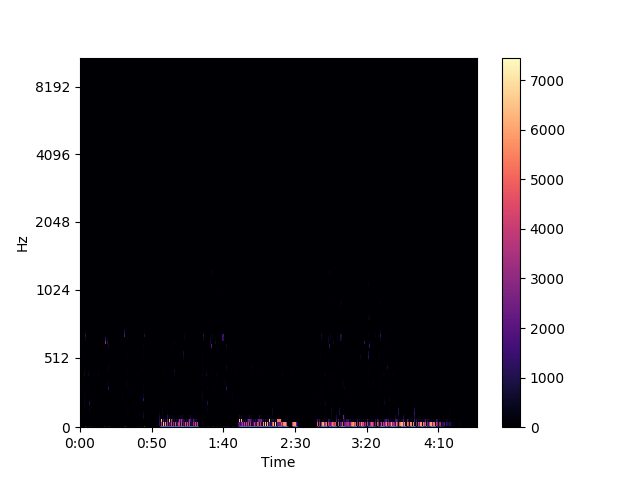

In [49]:
S, phase = librosa.magphase(D)
print(S.dtype, phase.dtype, np.allclose(D, S * phase))

melspec = librosa.feature.melspectrogram(y=y, sr=sr)

# Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr)

print(np.allclose(melspec, melspec_stft))

plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()
plt.show()

In [50]:
librosa.display.waveplot(y=y, sr=sr)